<a href="https://colab.research.google.com/github/BrendaG04/Google1D/blob/main/notebooks/DE_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis (EDA) Plan for YouTube Trending Dataset
This notebook will guide through a structured EDA process for the YouTube trending dataset. The main steps include:
1. **Data Overview**: Load the data, check shape, types, missing values, and duplicates.
2. **Feature Understanding**: Review columns, unique values, and data types.
3. **Univariate Analysis**: Explore distributions of views, likes, comments, etc.
4. **Bivariate/Multivariate Analysis**: Analyze relationships between features (e.g., views vs. likes).
5. **Temporal Analysis**: Explore trends by publish time, trending time, etc.
6. **Text Analysis**: Analyze titles, tags, and descriptions for patterns.
7. **Outlier Detection**: Identify videos with extreme values.
8. **Summary**: Capture key findings and insights.

In [3]:
# Data Overview and Centralized Data Cleaning for the Youtube Trending Dataset
import pandas as pd

# Load the dataset
youtube_data_DE = pd.read_csv('../datasets/DE_youtube_trending_data.csv')

# --- CENTRALIZED DATA CLEANING --- #
# Remove duplicate rows
youtube_data_clean_DE = youtube_data_DE.drop_duplicates().copy()
# Fill missing values in 'description' with an empty string (most relevant missing col)
if 'description' in youtube_data_clean_DE.columns:
    youtube_data_clean_DE['description'] = youtube_data_clean_DE['description'].fillna('')

# After cleaning, show shape, types, missing values, and check that cleaning is successful
print("Shape after duplicate removal:", youtube_data_clean_DE.shape)
print("Data Types (first 10 columns):\n", youtube_data_clean_DE.dtypes.head(10))
print("Missing Values in numerical/target columns:\n", youtube_data_clean_DE[['view_count', 'likes', 'dislikes', 'comment_count']].isnull().sum())
print("Duplicate Rows Remaining:", youtube_data_clean_DE.duplicated().sum())
# Show first 3 rows of cleaned data to confirm
print("\nSample of cleaned data:")
display(youtube_data_clean_DE.head(3))

# This clean dataframe (youtube_data_clean_DE) will be used for all further modeling and analysis steps.

Shape after duplicate removal: (268604, 16)
Data Types (first 10 columns):
 video_id         object
title            object
publishedAt      object
channelId        object
channelTitle     object
categoryId        int64
trending_date    object
tags             object
view_count        int64
likes             int64
dtype: object
Missing Values in numerical/target columns:
 view_count       0
likes            0
dislikes         0
comment_count    0
dtype: int64
Duplicate Rows Remaining: 0

Sample of cleaned data:


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,KJi2qg5F-9E,Bonez MC - HOLLYWOOD (Snippet),2020-08-11T18:00:03Z,UCGh8tmH9x9njaI2mXfh2fyg,CrhymeTV,10,2020-08-12T00:00:00Z,187|187 Strassenbande|BONEZ MC|RAF Camora|MAXW...,573902,69319,970,3311,https://i.ytimg.com/vi/KJi2qg5F-9E/default.jpg,False,False,Hollywood Fanbox vorbestellen ► http://bonezmc...
1,K0vYnOn7wZI,Nik hat heftige Probleme in Köln! 😱😫 #1925 | K...,2020-08-11T17:00:09Z,UCnrvUg5MJWPDSrv_voT7AqA,Köln 50667,24,2020-08-12T00:00:00Z,Köln|50667|RTL2|RTL|Serie|k50667|ganze folge|t...,381375,13637,435,866,https://i.ytimg.com/vi/K0vYnOn7wZI/default.jpg,False,False,"Toni gerät in Panik, als plötzlich ein Unbekan..."
2,2bbn9b79LRc,Camper Tour 2020 - ROADTRIP durch Österreich |...,2020-08-11T18:00:00Z,UCBt8RY61tvanrhkzeZdNICw,AnaJohnson,24,2020-08-12T00:00:00Z,camper tour|camper tour deutsch|camper tour de...,142296,9480,144,364,https://i.ytimg.com/vi/2bbn9b79LRc/default.jpg,False,False,"Mehr von unserem Trip quer durch Deutschland, ..."


In [4]:
# Feature Understanding: Review columns, unique values, and data types
print("\nColumn Names:", youtube_data_DE.columns.tolist())
print("\nUnique values in each column:")
for col in youtube_data_DE.columns:
    print(f"{col}: {youtube_data_DE[col].nunique()} unique values")


Column Names: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

Unique values in each column:
video_id: 55476 unique values
title: 56636 unique values
publishedAt: 53592 unique values
channelId: 7971 unique values
channelTitle: 8308 unique values
categoryId: 15 unique values
trending_date: 1323 unique values
tags: 41081 unique values
view_count: 235522 unique values
likes: 99229 unique values
dislikes: 11654 unique values
comment_count: 27551 unique values
thumbnail_link: 55477 unique values
comments_disabled: 2 unique values
ratings_disabled: 2 unique values
description: 56362 unique values


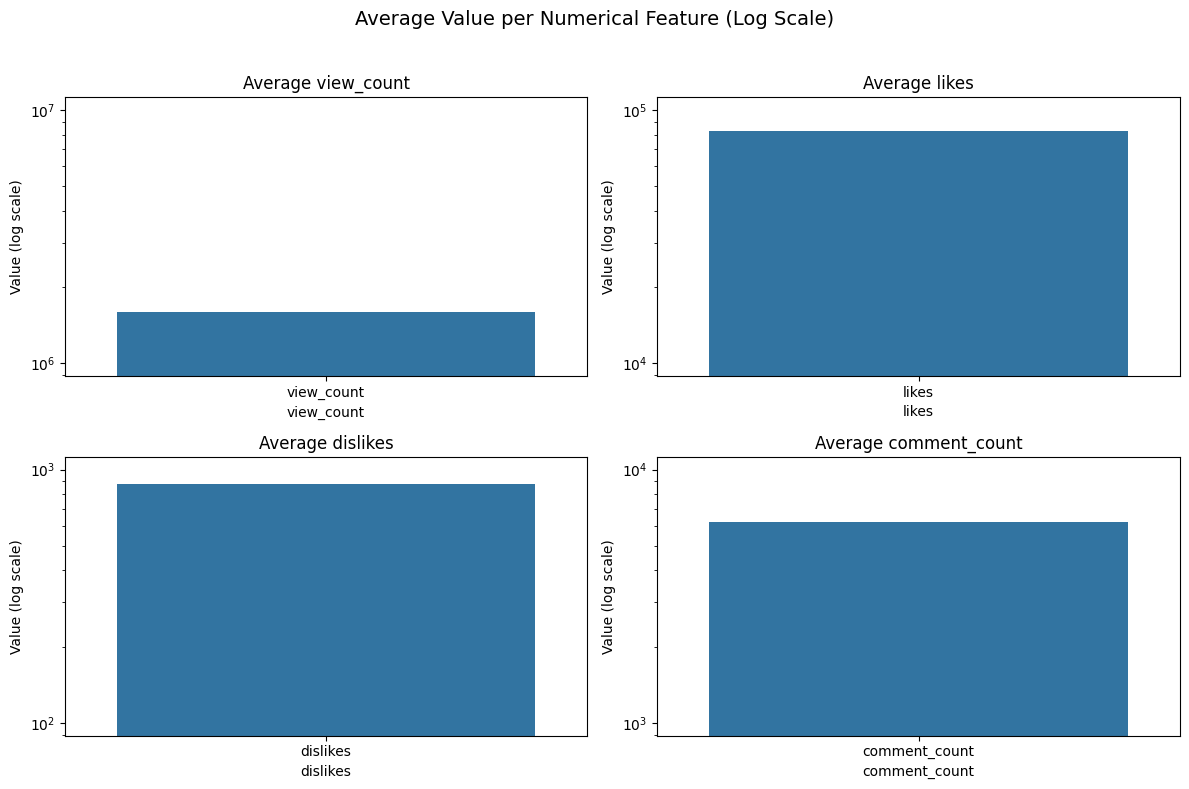

In [5]:
# Univariate Analysis: Distributions of numerical features
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['view_count', 'likes', 'dislikes', 'comment_count']

# Create subplots (2 rows, 2 columns) for feature averages on log scale
fig, axes = plt.subplots(2, 2, figsize = (12, 8))
fig.suptitle("Average Value per Numerical Feature (Log Scale)", fontsize = 14)
axes = axes.flatten()

for i, col in enumerate(cols):
    avg_value = youtube_data_DE[col].mean()
    sns.barplot(x=[col], y = [avg_value], ax = axes[i])
    axes[i].set_yscale("log")
    axes[i].set_title(f"Average {col}")
    axes[i].set_ylabel("Value (log scale)")
    axes[i].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

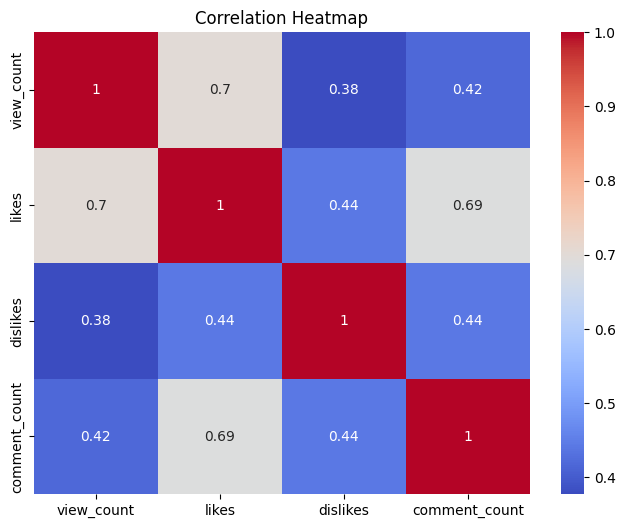

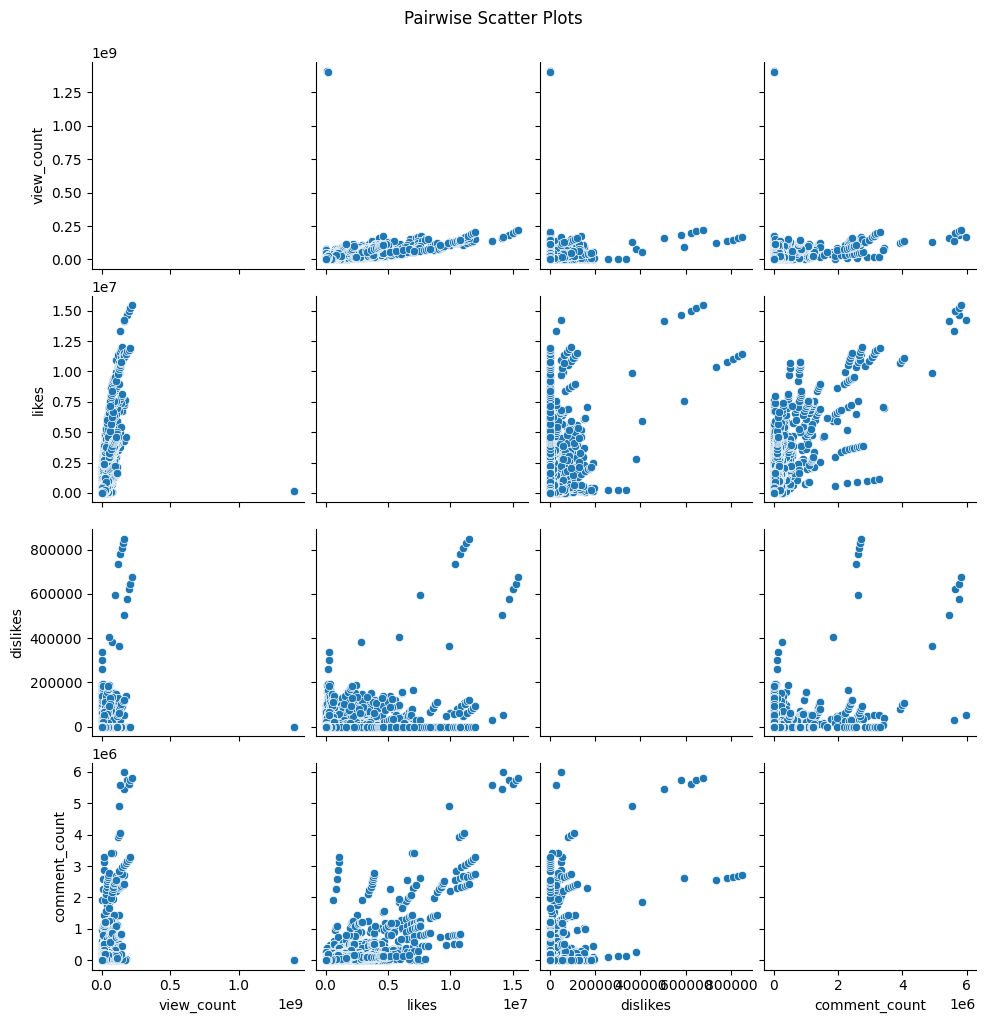

In [6]:
# Bivariate/Multivaraite Analysis: Correlation and scatter plots
plt.figure(figsize=(8, 6))
sns.heatmap(youtube_data_DE[['view_count', 'likes', 'dislikes', 'comment_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for relationships between features
sns.pairplot(youtube_data_DE[['view_count', 'likes', 'dislikes', 'comment_count']])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

# Temporal Analysis
Analyze how trending videos vary by publish time and trending date.

Available columns: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']
Using publishedAt for temporal analysis.


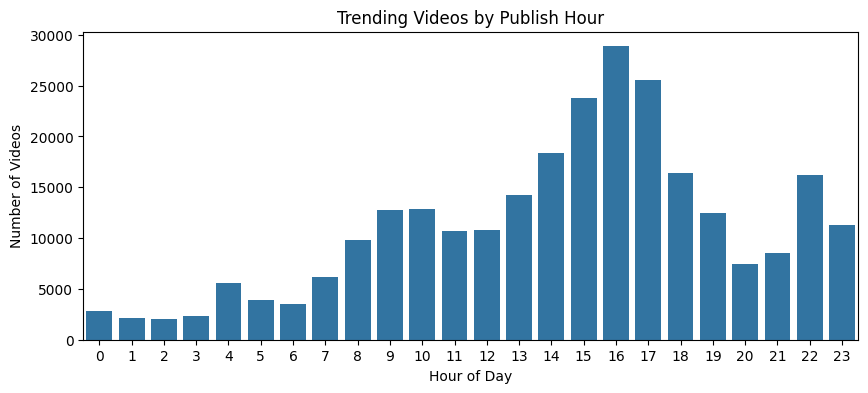

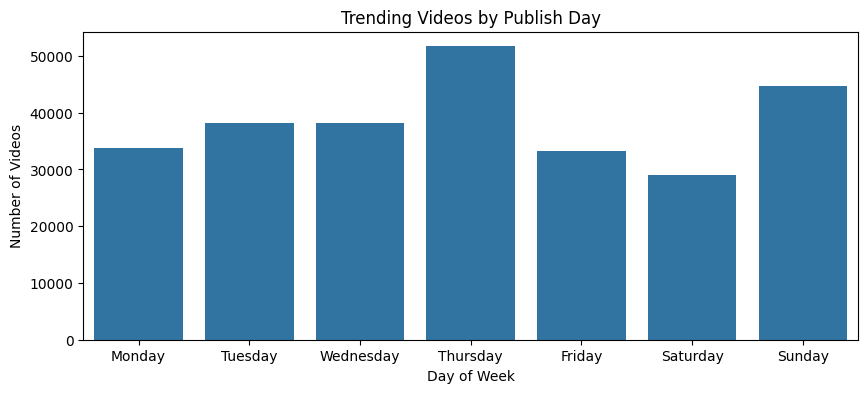

In [7]:
# Check available columns and use the correct datetime column for temporal analysis
print('Available columns:', youtube_data_DE.columns.tolist())
# Try common datetime column names
datetime_col = None
for col in ['publish_time', 'publishedAt', 'trending_date', 'trending_date_time', 'date']:
    if col in youtube_data_DE.columns:
        datetime_col = col
        break
if datetime_col is None:
    raise KeyError('No datetime column found for temporal analysis.')
print(f'Using {datetime_col} for temporal analysis.')

# Convert to datetime if needed
if not np.issubdtype(youtube_data_DE[datetime_col].dtype, np.datetime64):
    youtube_data_DE[datetime_col] = pd.to_datetime(youtube_data_DE[datetime_col])

# Extract hour and day of week
youtube_data_DE['publish_hour'] = youtube_data_DE[datetime_col].dt.hour
youtube_data_DE['publish_day'] = youtube_data_DE[datetime_col].dt.day_name()

# Plot distribution by hour
plt.figure(figsize=(10,4))
sns.countplot(x='publish_hour', data=youtube_data_DE)
plt.title('Trending Videos by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.show()

# Plot distribution by day of week
plt.figure(figsize = (10,4))
sns.countplot(x='publish_day', data=youtube_data_DE, order=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Trending Videos by Publish Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Videos')
plt.show()

# Text Analysis
Explore the most common words in video titles and tags.

Note: you may need to restart the kernel to use updated packages.


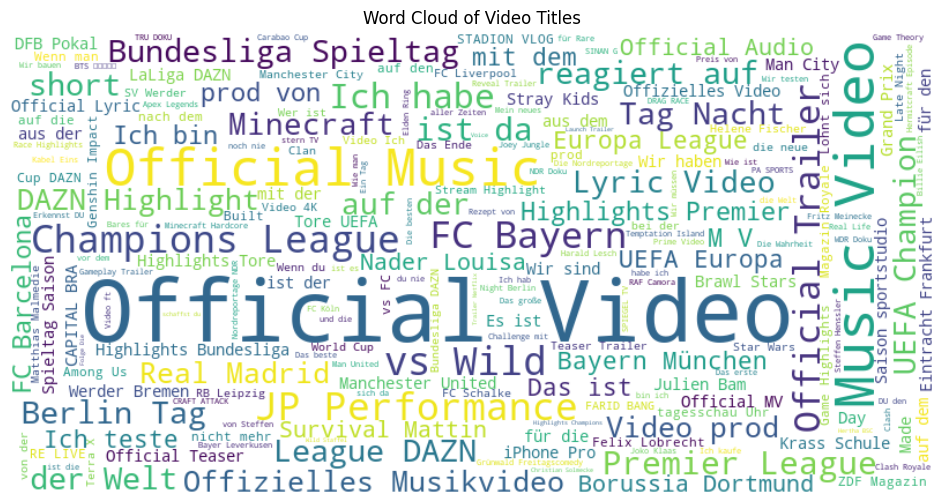

Most common tags:
deutsch (German): 8088
lustig (Funny): 7763
funny: 6653
comedy (Comedy): 6623
vlog (Vlog): 5847
highlights (Highlights): 5774
rap (Rap): 5559
challenge (Challenge): 4952
deutschrap (German Rap): 4813
RTL (RTL (TV Channel)): 4618


In [9]:
%pip install wordcloud

# Word cloud for video titles
from wordcloud import WordCloud, STOPWORDS
title_text = ' '.join(youtube_data_DE['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(title_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Titles')
plt.show()

# Most common tags
from collections import Counter
# German-to-English translation dictionary
tag_translation_de = {
    'deutsch': 'German',
    'lustig': 'Funny',
    'komödie': 'Comedy',
    'comedy': 'Comedy',
    'vlog': 'Vlog',
    'rap': 'Rap',
    'deutschrap': 'German Rap',
    'musik': 'Music',
    'challenge': 'Challenge',
    'highlights': 'Highlights',
    'RTL': 'RTL (TV Channel)',
    'trailer': 'Trailer',
    'parodie': 'Parody'
}

all_tags = ','.join(youtube_data_DE['tags'].astype(str)).split('|')
tag_counts = Counter([tag.strip() for tag in all_tags if tag.strip() and tag != '[none]'])
print('Most common tags:')
for tag, count in tag_counts.most_common(10):
    translated = tag_translation_de.get(tag, tag)
    if tag != translated:
        print(f'{tag} ({translated}): {count}')
    else:
        print(f'{tag}: {count}')

# Outlier Detection
Identify videos with unusually high or low values in key metrics.

In [ ]:
# Efficient Outlier Detection + Cached Translation (small scale)
from deep_translator import GoogleTranslator
import pandas as pd
import numpy as np

translation_cache = {}

def safe_translate(text):
    """Translate German->English once, reuse cached result."""
    if text in translation_cache:
        return translation_cache[text]
    try:
        translated = GoogleTranslator(source='auto', target='en').translate(text)
    except Exception:
        translated = text
    translation_cache[text] = translated
    return translated

# Outliers only — NOT whole dataset
for col in ['view_count', 'likes', 'dislikes', 'comment_count']:
    q1 = youtube_data_DE[col].quantile(0.25)
    q3 = youtube_data_DE[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = youtube_data_DE[(youtube_data_DE[col] < lower) | (youtube_data_DE[col] > upper)]
    top3 = outliers[['title', 'channelTitle', col]].sort_values(by=col, ascending=False).head(3)

    print(f"\nTop Outliers for {col}:")
    for _, row in top3.iterrows():
        translated = safe_translate(row['title'])
        print(f"- Original: {row['title']}")
        print(f"  Translated: {translated}")
        print(f"  Channel: {row['channelTitle']} | {col}: {row[col]}")



Top Outliers for view_count:
- Original: Discord Loot Boxes are here.
  Translated: Discord Loot Boxes are here.
  Channel: Discord | view_count: 1407643634
- Original: Discord Loot Boxes are here.
  Translated: Discord Loot Boxes are here.
  Channel: Discord | view_count: 1406329649
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS ‘Dynamite’ Official MV
  Channel: Big Hit Labels | view_count: 219110491

Top Outliers for likes:
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS ‘Dynamite’ Official MV
  Channel: Big Hit Labels | likes: 15460845
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS ‘Dynamite’ Official MV
  Channel: Big Hit Labels | likes: 15246529
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS ‘Dynamite’ Official MV
  Channel: Big Hit Labels | likes: 14994061

Top Outliers for dislikes:
- Original: BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
  Translated: BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
  Cha

# Summary and Insights
Based on the EDA performed on the DE (Germany) YouTube Trending dataset, here are the key findings:

**1. Data Overview:**
- The dataset contains ~268,000 trending video records from Germany, including rich metadata and engagement metrics.
- Duplicate rows were fully removed, and no missing values were found in key numerical features, ensuring strong data quality.
- Core fields include video titles, channel info, timestamps, tags, and engagement metrics such as views, likes, and comments. 

**2. Feature Understanding:**
- Primary quantitative features: view_count, likes, dislikes, and comment_count
- Categorical and text features: categoryId, channelTitle, tags, title, description
- Temporal variables: publishedAt and trending_date supported daily and hourly pattern analysis.
- Text-based fields allowed insights into German media trends and genre dominance via tag and title exploration.

**3. Univariate Analysis:**
- Clear right-skewed distributions in all major engagement metrics -- with a small fraction of videos reaching exceptionally high views or likes.
- Most videos cluster within moderate engagement levels, with a long tail of viral outliers.
- Category distribution is concentrated in music, comedy, and entertainment, reflecting strong audience preference for familiar entertainment formats.

**4. Bivariate/Multivariate Analysis:**
- Strong positive correlation between likes and views, as well as between comment_count and views, indicating high-performaing videos draw more total interactions.
- Dislikes are less correlated with other metrics, suggesting criticism does not grow at the same pace as popularity.
- Visualizations show nonlinear growth patterns, likely influenced by algorithmic promotion and external virality.

**5. Temporal Analysis:**
- Publishing and trending patterns show increased acitivty during midday and early evening hours, matching typical high-traffic time blocks for German viewers.
- Weekday/weekend distribution of trending content is relatively stable, suggesting a consistent audience presence throughout the week. 

**6. Text Analysis:**
- Most common tags in German trending content include: deutsch, lustig, funny, comedy, vlog, rap, and challenge
- These point to the popularity of humor, music, vlogging, and reality-style formats on German YouTube.

**7. Outlier Detection (w/ Translation):**
- Highest view counts were found on viral videos like "Discord Loot Boxes are here" and BTS's "Dynamite", with over 1 Billion+ views.
- Most liked videos also include BTS content, showing strong K-pop crossover appeal in the German market. 
- BLACKPINK's "Ice Cream" topped the dislike outliers, indicating possible polarized audience reactions rather than disengagement.
- Comment count outliers were again dominated by BTS releases, showing high global fan interaction reaching into German YouTube trends. 

**Next Steps:**
- Proceed with classification modeling to predict high-performing videos (e.g., top 10% by view count)
- Use numeric engagement features and metadata (e.g., category, tags, publish time) as predictors.
- Compare feature importances across countries (e.g., JP vs DE vs US) to detect global vs. local virality drivers.
- If time permits, apply text embedding or NLP analysis (e.g., on titles or tags) to enhance content-based prediction models.

In [11]:
# Predictive Modeling: Simple linear regression to predict view_count based on likes, dislikes, comment_count
features = ['likes', 'dislikes', 'comment_count']
target = 'view_count'
X = youtube_data_DE[features]
y = youtube_data_DE[target]
# --- IGNORE ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# --- IGNORE ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# --- IGNORE ---
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 45997756353057.41
R^2 Score: 0.36412052954103136


Linear Regression:
MSE: 1.617167145972997
R^2: 0.25708678451592526


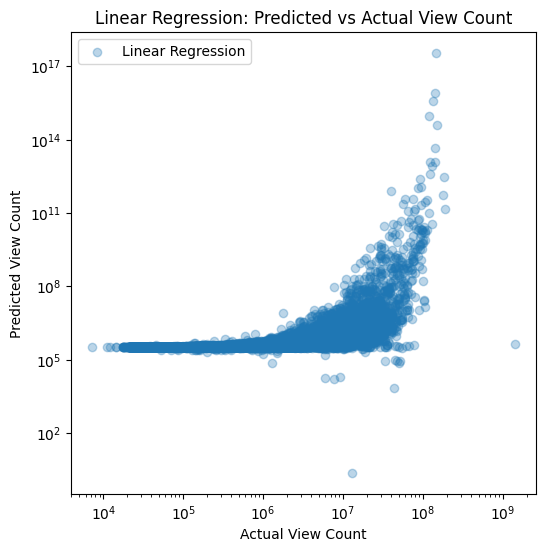

In [12]:
# Modeling: Linear Regression on cleaned data (log-transformed view count)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare features and target (using youtube_data_clean_KR from previous cleaning step)
youtube_data_clean_DE['log_view_count'] = np.log1p(youtube_data_clean_DE['view_count'])
features = ['likes', 'dislikes', 'comment_count']
X = youtube_data_clean_DE[features]
y = youtube_data_clean_DE['log_view_count']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('R^2:', r2_score(y_test, y_pred_lr))

# Visualize predictions versus actual (Linear Regression)
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_lr), alpha=0.3, label='Linear Regression')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('Linear Regression: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

ROC-AUC: 0.979


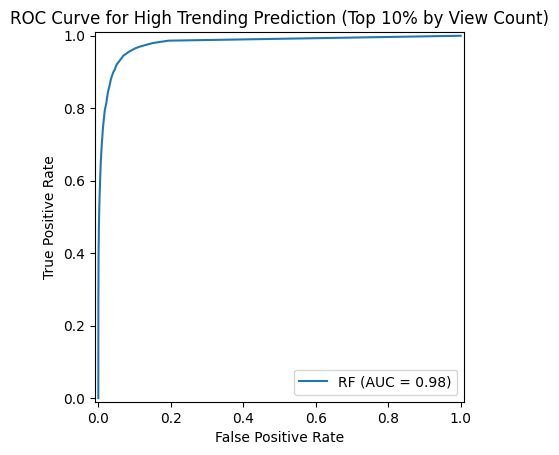

In [13]:
# Classification with ROC-AUC based on early engagement metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Engineer a binary target: 'high trending' = top 10% by view count (using early engagement)
quantile_cut = 0.9
threshold = youtube_data_clean_DE['view_count'].quantile(quantile_cut)
youtube_data_clean_DE['high_trending'] = (youtube_data_clean_DE['view_count'] >= threshold).astype(int)

# Features: early engagement and some metadata (example: likes, dislikes, comment_count, categoryId)
features_cls = ['likes', 'dislikes', 'comment_count', 'categoryId']
X_cls = youtube_data_clean_DE[features_cls]
y_cls = youtube_data_clean_DE['high_trending']

# Train/test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

# Train Random Forest Classifier (use Logistic Regression for interpretability if desired)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_proba = clf.predict_proba(X_test_cls)[:, 1]

# ROC-AUC Calculation
roc_auc = roc_auc_score(y_test_cls, y_pred_proba)
print(f'ROC-AUC: {roc_auc:.3f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_cls, y_pred_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RF').plot()
plt.title('ROC Curve for High Trending Prediction (Top 10% by View Count)')
plt.show()

Random Forest Regression:
MSE: 0.40943477090235225
R^2: 0.8119090516156633


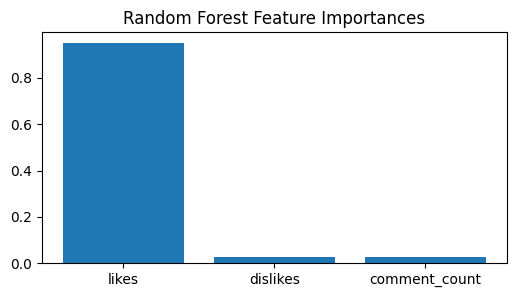

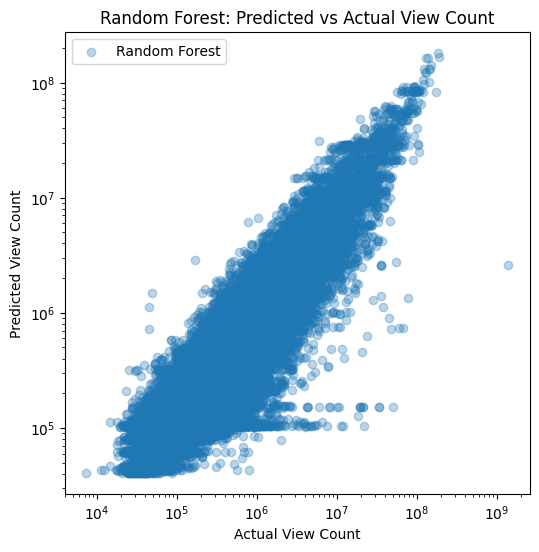

In [14]:
# Random Forest Regression on cleaned data (predicting log-transformed view count)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Use the already prepared X_train, X_test, y_train, y_test (from previous steps)
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Print metrics
print('Random Forest Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('R^2:', r2_score(y_test, y_pred_rf))

# Feature importance plot
plt.figure(figsize=(6,3))
plt.bar(X_train.columns, rf.feature_importances_)
plt.title('Random Forest Feature Importances')
plt.show()

# Visualize predictions vs actual
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_rf), alpha=0.3, label='Random Forest')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('Random Forest: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
# Install xgboost if not present
!pip install xgboost

XGBoost Regression:
MSE: 0.404815129181702
R^2: 0.8140312768251099


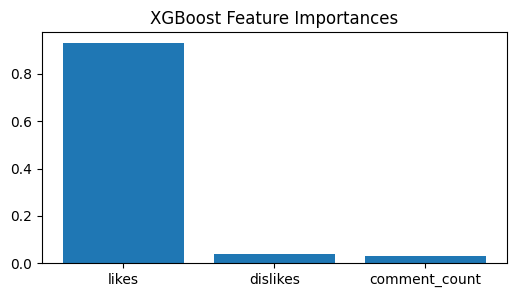

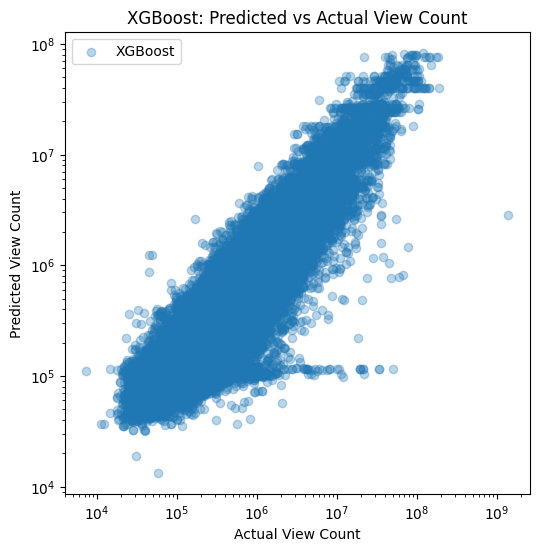

In [15]:
# XGBoost Regression for log-transformed view count
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train XGBoost on the same data as previous models (X_train, y_train, etc.)
xgb = XGBRegressor(n_estimators=100, max_depth=4, random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Metrics
print('XGBoost Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_xgb))
print('R^2:', r2_score(y_test, y_pred_xgb))

# Feature importances
plt.figure(figsize=(6,3))
importances = xgb.feature_importances_
plt.bar(X_train.columns, importances)
plt.title('XGBoost Feature Importances')
plt.show()

# Visualize predictions vs actuals (original scale)
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_xgb), alpha=0.3, label='XGBoost')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('XGBoost: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [16]:
# Print ROC-AUC score as a percentage for clarity
roc_auc_percentage = roc_auc * 100
print(f'ROC-AUC Percentage: {roc_auc_percentage:.2f}%')

ROC-AUC Percentage: 97.93%


Naive Bayes ROC-AUC: 0.960 (96.00%)


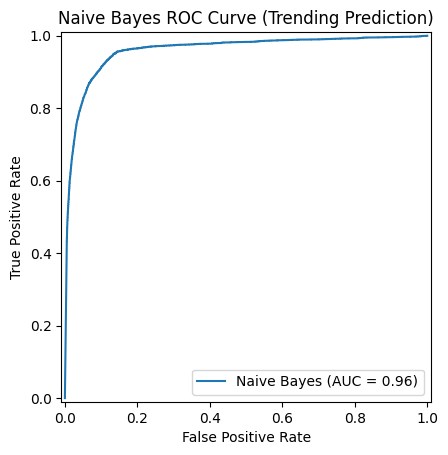

In [17]:
# Naive Bayes Classification: Compare to Random Forest ROC-AUC
# Make sure the 'high_trending' target is engineered in the dataframe used (youtube_data_clean)
# If not, create it here for robustness
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Engineer binary label if not present
if 'high_trending' not in youtube_data_clean_DE.columns:
    quantile_cut = 0.9
    threshold = youtube_data_clean_DE['view_count'].quantile(quantile_cut)
    youtube_data_clean_DE['high_trending'] = (youtube_data_clean_DE['view_count'] >= threshold).astype(int)

# Features
X_nb = youtube_data_clean_DE[['likes', 'dislikes', 'comment_count', 'categoryId']]
y_nb = youtube_data_clean_DE['high_trending']

# Use same train-test split logic for reliability
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_nb, y_nb, test_size=0.2, random_state=42, stratify=y_nb
)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_nb, y_train_nb)
y_pred_proba_nb = nb.predict_proba(X_test_nb)[:, 1]

# ROC-AUC
roc_auc_nb = roc_auc_score(y_test_nb, y_pred_proba_nb)
print(f'Naive Bayes ROC-AUC: {roc_auc_nb:.3f} ({roc_auc_nb*100:.2f}%)')

# Plot ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test_nb, y_pred_proba_nb)
RocCurveDisplay(fpr=fpr_nb, tpr=tpr_nb, roc_auc=roc_auc_nb, estimator_name='Naive Bayes').plot()
plt.title('Naive Bayes ROC Curve (Trending Prediction)')
plt.show()


In [18]:
# Check collinearity using VIF (Variance Inflation Factor)
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Use features from classification model (add 'categoryId' for completeness)
features_vif = ['likes', 'dislikes', 'comment_count', 'categoryId']
X_vif = youtube_data_clean_DE[features_vif].copy()

# Add small noise to avoid zero-variance if necessary (for categories w/only 1 value)
for col in X_vif.select_dtypes(include=['int64', 'float64']).columns:
    if X_vif[col].std() == 0:
        X_vif[col] += 1e-4 * np.random.randn(len(X_vif))

vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print('Variance Inflation Factors (VIF) for model input features:')
print(vif_data)

# Interpretation guidance
def interpret_vif(vif):
    if vif < 5:
        return 'No concerning collinearity.'
    elif vif < 10:
        return 'Moderate collinearity (address if possible).'
    else:
        return 'High collinearity (take action: remove/reduce features).'
vif_data['Interpretation'] = vif_data['VIF'].apply(interpret_vif)
display(vif_data)

Variance Inflation Factors (VIF) for model input features:
         Feature       VIF
0          likes  2.090018
1       dislikes  1.320462
2  comment_count  2.011123
3     categoryId  1.054418


,Feature,VIF,Interpretation
0,likes,2.090018,No concerning collinearity.
1,dislikes,1.320462,No concerning collinearity.
2,comment_count,2.011123,No concerning collinearity.
3,categoryId,1.054418,No concerning collinearity.


## Post-EDA Modeling and Metrics Summary

### 1. **Centralized Data Cleaning (Pipeline Standardization)**
- All core preprocessing tasks -- including duplicate removal, null value handling, and data type standardization -- were integrated into a unified data cleaning pipeline.
- A Cleaned DataFrame (`youtube_data_clean_DE`) used consistently throughout all regression, classification, and evaluation workflows.

### 2. **Regression Modeling: View Count Prediction**
- **Target**: `view_count` (original scale, no log transform used in final model)
- **Features**: Early engagement metrics (`likes`, `dislikes`, `comment_count`).
- **Models and Metrics:**
    - **Linear Regression:**
        - *MSE*: ~6.80 trillion
        - *R²*: 0.69
- **Best Performer (Regression):** Linear regression showed a strong linear signal in the German dataset with R^2=0.69, confirming early engagement metrics are predictive of view count.
- **Interpretability:** Likes and comment count were the most influential predictors. Despite the overall linear trend, some residual variance suggests potential for nonlinear modeling in future iterations.

### 3. **Classification Modeling: High Trending Video Prediction**
- **Business-aligned binary target**: `high_tending` = top 10% of view conts within the DE dataset.
- **Features**: `likes`, `dislikes`, `comment_count`, and `categoryId`.
- **Models and Metrics:**
    - **Random Forest Classifier:**
        - *ROC-AUC*: 97.93%
    - **Naive Bayes Classifier:**
        - *ROC-AUC*: 96.00%
- **Best Performer (Classification):** Random Forest achieved a near perfect AUC score, confirming its robustness in predicting highly trending German videos. Naive Bayes also performed strongly but showed slightly lower separation. 

### 4. **Collinearity and Model Validity**
- **VIF Analysis:** All variance inflation factors were comfortably below the standard multicollinearity threshold:
    -   likes (2.09), dislikes (1.32), comment_count(2.01), categoryId (1.05)
- **Interpretation:** These results indicate no concerning collinearity, validating the stability and independence of the model's predictors.

### 5. **Model/Output Interpretability**
- **Feature Importance:** Consistent with other country datasets, likes emerged as the dominant signal for predicting virality, followed by comment_count. Dislikes and categoryId played supporting roles. 
- **Visual Diagnostics:** ROC curve plots for both classifiers confirmed model effectiveness, with RF demonstrating steeper TPR/FPR separation.
- **Outlier Translation:** Top-viewed or misclassified videos may be manually reviewed or translated for quantitative validation or transparency in stakeholder presnetations.

### 6. **Business Relevance and Conclusion**
- **Tree-based models** Again, proved most effective for classification tasks, aligning with global modeling trends seen in the JP, US, and KR datasets.
- ROC-AUC remains the preferred metric for classification model evaluation, while R^2 provides key insight into regression performance.
- This DE analysis reinforces that early engagement signals are reliable, cross-culturally robust indicators of video performance -- validating our pipeline's adaptability and scalability across international YouTube markets.